# Friends TV-Show 10 Season Transcript Exploratory Analysis

This notebook aims to extract the characteristics of the discourse among the characters across 10 - seasons of the [Friends TV show (1994 - 2004)](https://www.imdb.com/title/tt0108778/).


The aim of the analysis is to see the word and ngram characteristics of the text, the character specific structures and quantitative evaluation of the character, season and episode based distribution of word and dialog characteristics.

In [1]:
import pandas as pd
import os
import json
import csv
from bs4 import BeautifulSoup
import codecs
import nltk
import re
import glob
!pip install BPEmb
from bpemb import BPEmb
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk import FreqDist
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 18.1 MB/s eta 0:00:00


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


# Load Data
Load the comma separated narrator, discourse, episode and season details for the Friends data.



In [70]:
data = pd.read_csv('/content/original_friends_transcripts.csv', encoding='ISO-8859-1')
seasons = data['season']
episodes = data['episode']
corpus = data['line']
print(corpus[:5]) # Shows the first 5 lines of the corpus)

0                       THERE'S NOTHING TO TELL.  
1                IT'S JUST SOME GUY I WORK WITH.  
2                     YOU'RE GOING OUT WITH HIM.  
3    THERE'S GOT TO BE SOMETHING WRONG WITH HIM.  
4                      ALL RIGHT, JOEY, BE NICE.  
Name: line, dtype: object


# The total number of words

In [71]:
# number of words
import re
# concatanate all strings from all seasons
narrative = ''.join(corpus)
words=re.findall('\w+', narrative)
print("The total number of words in ten season of Friends is {}".format(len(words)))
print(words[:50])


The total number of words in ten season of Friends is 711496
['THERE', 'S', 'NOTHING', 'TO', 'TELL', 'IT', 'S', 'JUST', 'SOME', 'GUY', 'I', 'WORK', 'WITH', 'YOU', 'RE', 'GOING', 'OUT', 'WITH', 'HIM', 'THERE', 'S', 'GOT', 'TO', 'BE', 'SOMETHING', 'WRONG', 'WITH', 'HIM', 'ALL', 'RIGHT', 'JOEY', 'BE', 'NICE', 'SO', 'DOES', 'HE', 'HAVE', 'A', 'HUMP', 'A', 'HUMP', 'AND', 'A', 'HAIRPIECE', 'WAIT', 'DOES', 'HE', 'EAT', 'CHALK', 'I']


# The total number of unique words

In [72]:
print("The total number of unique words in ten season of Friends is {}".format(len(set(re.findall(r'\w+', narrative, re.UNICODE)))))

The total number of unique words in ten season of Friends is 22951


# Season based word numbers

In [73]:
season_word = {}
season_word_length={}
season_unique_word = {}
freq_splits = {}
word_list= []
numbers = {}
complete_narrative =[]
stop_words = set(stopwords.words('english'))

for season in range(1,11):
    rslt_df = data[data['season'] == season]
    narrative = ''.join(rslt_df['line'])
    docwords = re.findall('\w+', narrative)
    season_word[season] = docwords
    season_unique_word[season] = set(re.findall(r'\w+', narrative, re.UNICODE))
    freq_splits[season] = FreqDist(docwords)
    complete_narrative += docwords

In [12]:
word_per_season = []
for season in range(1,11):
  word_per_season.append(len(season_word[season]))
  print("For season {} the number of words is {}".format(season,len(season_word[season])))

For season 1 the number of words is 65801
For season 2 the number of words is 68735
For season 3 the number of words is 73343
For season 4 the number of words is 68768
For season 5 the number of words is 70797
For season 6 the number of words is 74764
For season 7 the number of words is 72583
For season 8 the number of words is 75240
For season 9 the number of words is 81983
For season 10 the number of words is 59482


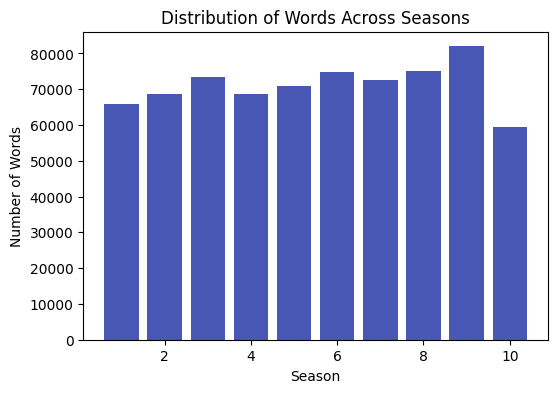

In [91]:
season_range= list(range(1,11))
plt.figure(figsize=(6,4))
plt.bar(season_range, word_per_season,color='#4958B5' )
plt.title('Distribution of Words Across Seasons', fontsize=12)
plt.ylabel('Number of Words', fontsize=10)
plt.xlabel('Season', fontsize=10)

plt.show()


In [83]:
uniqueword_per_season = []
for season in range(1,11):
  uniqueword_per_season.append(len(season_unique_word[season]))
  print("For season {} the number of unique words is {}".format(season,len(season_unique_word[season])))

For season 1 the number of unique words is 4797
For season 2 the number of unique words is 4947
For season 3 the number of unique words is 5045
For season 4 the number of unique words is 4416
For season 5 the number of unique words is 4415
For season 6 the number of unique words is 4261
For season 7 the number of unique words is 4871
For season 8 the number of unique words is 5049
For season 9 the number of unique words is 5574
For season 10 the number of unique words is 4523


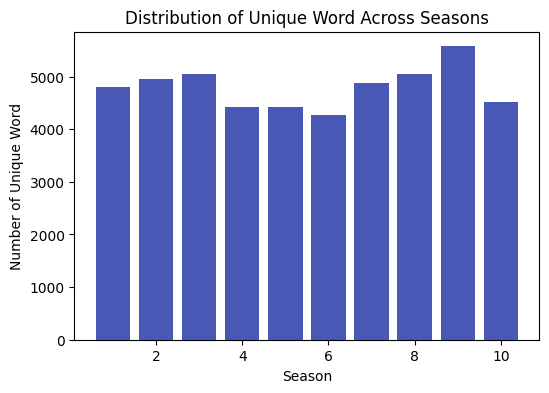

In [93]:
season_range= list(range(1,11))
plt.figure(figsize=(6,4))

plt.bar(season_range,uniqueword_per_season,color='#4958B5')
plt.title('Distribution of Unique Word Across Seasons', fontsize=12)
plt.ylabel('Number of Unique Word', fontsize=10)
plt.xlabel('Season', fontsize=10)
plt.show()

In [94]:
for season in range(1,11):
  print("For season {} the top 10 most frequent words are {}".format(season, freq_splits[season].most_common(10)))

For season 1 the top 10 most frequent words are [('I', 3122), ('YOU', 2949), ('S', 1612), ('THE', 1365), ('TO', 1325), ('IT', 1279), ('A', 1206), ('THAT', 986), ('AND', 929), ('T', 899)]
For season 2 the top 10 most frequent words are [('I', 3183), ('YOU', 3034), ('S', 1539), ('THE', 1499), ('TO', 1474), ('IT', 1280), ('A', 1201), ('THAT', 1035), ('AND', 966), ('T', 897)]
For season 3 the top 10 most frequent words are [('I', 3567), ('YOU', 3400), ('TO', 1754), ('S', 1685), ('THE', 1526), ('IT', 1455), ('A', 1240), ('THAT', 1169), ('AND', 1020), ('T', 1017)]
For season 4 the top 10 most frequent words are [('I', 3475), ('YOU', 3069), ('TO', 1749), ('THE', 1447), ('S', 1425), ('IT', 1373), ('A', 1212), ('THAT', 1119), ('OH', 1054), ('AND', 1003)]
For season 5 the top 10 most frequent words are [('I', 3663), ('YOU', 3285), ('TO', 1752), ('S', 1491), ('IT', 1437), ('THE', 1316), ('THAT', 1227), ('A', 1142), ('T', 995), ('OH', 948)]
For season 6 the top 10 most frequent words are [('I', 37

In [95]:
freq_splits_all_seasons = FreqDist(complete_narrative)
frequent_word_list = []
frequency_word_list = []
for i in range(0,20):
  frequent_word_list.append(freq_splits_all_seasons.most_common(20)[i][0])
  frequency_word_list.append(freq_splits_all_seasons.most_common(20)[i][1])



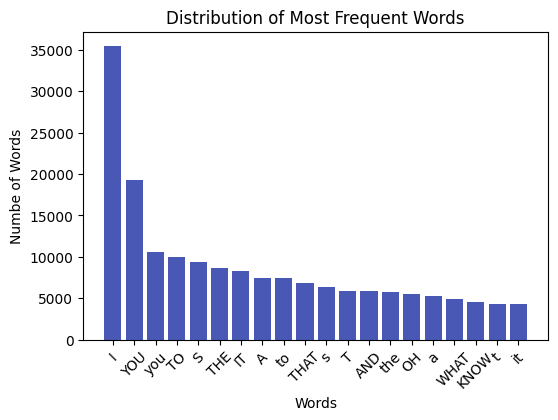

In [97]:
plt.figure(figsize=(6,4))
plt.bar(frequent_word_list, frequency_word_list, color='#4958B5')
plt.title('Distribution of Most Frequent Words', fontsize=12)
plt.ylabel('Numbe of Words', fontsize=10)
plt.xlabel('Words', fontsize=10)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.show()

In [98]:
# found outlawed words

def find_outlaw(word):
    """Find words that contain a same character 3+ times in a row."""
    is_outlaw = False
    for i, letter in enumerate(word):
        if i > 1:
            if word[i] == word[i-1] == word[i-2] and word[i].isalpha():
                is_outlaw = True
                break
    return is_outlaw

In [99]:
for season in range(1,11):
    rslt_df = data[data['season'] == season]
    narrative = ''.join(rslt_df['line'])
    words = re.findall('\w+', narrative)
    outlaws = [s for s in words if find_outlaw(s)]
    print("In season {}, {} strings are outlaw words, that is {:.2%} of total".format(season, len(outlaws), len(outlaws)/ len(words)))
    print("In season {}, example of outlaw strings are {}".format(season, outlaws))

In season 1, 21 strings are outlaw words, that is 0.03% of total
In season 1, example of outlaw strings are ['MMM', 'MMM', 'MWAAAHH', 'MWAAAHH', 'BWAAAAA', 'MMM', 'MMM', 'NOOOO', 'MMM', 'MMM', 'HELLOOO', 'SOOO', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'OHHH', 'MMM', 'MMM', 'HELLOOOO']
In season 2, 14 strings are outlaw words, that is 0.02% of total
In season 2, example of outlaw strings are ['MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'OHHH', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'SEEEVER', 'MMM']
In season 3, 18 strings are outlaw words, that is 0.02% of total
In season 3, example of outlaw strings are ['MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'BZZZ', 'AHHH', 'MMM', 'MMM', 'MMM', 'MMM', 'REEE', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM']
In season 4, 24 strings are outlaw words, that is 0.03% of total
In season 4, example of outlaw strings are ['MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'OOOOOOH', 'OOOOOOH', 'OOOOOOH', 'OOOOOOH', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM', 'MMM

In [101]:
import numpy as np
import random


outlaws = [s for s in complete_narrative if find_outlaw(s)]

res = np.array(outlaws)
unique_res = np.unique(res)
random.shuffle(unique_res)

print("Across all seasons {} strings are outlaw words, that is {:.2%} of total".format(len(outlaws), len(outlaws)/ len(complete_narrative)))
print("Across all seasons example of outlaw strings are {}".format(unique_res[:20]))

Across all seasons 141 strings are outlaw words, that is 0.02% of total
Across all seasons example of outlaw strings are ['GIIIFT' 'Grrreat' 'AHHH' 'Noooooo' 'mooo' 'HELLOOO' 'III' 'Mmmm' 'AHHHH'
 'HELLOOOO' 'SOOO' 'faaaaaaaaa' 'NOOOO' 'MMMSOUP' 'OOOOOOH' 'sss' 'MMM'
 'Ahhh' 'uhhhh' 'MONNN']


# Tokens

In [102]:
number_of_tokens ={}
tokens_norm ={}
tokens = {}
tokens_all = {}
bpemb_en = BPEmb(lang="en")
tokenizer = RegexpTokenizer(r'\w+')
lemmatiser = WordNetLemmatizer()

for season in range(1,11):
    rslt_df = data[data['season'] == season]
    narrative = ''.join(rslt_df['line'])
    tokens_all[season] = bpemb_en.encode(narrative)
    tokens_norm[season] = [lemmatiser.lemmatize(t.lower(), "v") for t in bpemb_en.encode(narrative)]

In [103]:
total_number_of_tokens =0
tokens_per_season = []
for season in range(1,11):
  print("Number of tokens in season {} is: {}".format(season, len(tokens_all[season])))
  total_number_of_tokens += len(tokens_all[season])
  tokens_per_season.append(len(tokens_all[season]))


print("The total number of tokens across all season is: {}".format(total_number_of_tokens))

Number of tokens in season 1 is: 98749
Number of tokens in season 2 is: 103542
Number of tokens in season 3 is: 109942
Number of tokens in season 4 is: 103060
Number of tokens in season 5 is: 107307
Number of tokens in season 6 is: 110976
Number of tokens in season 7 is: 107760
Number of tokens in season 8 is: 111709
Number of tokens in season 9 is: 121915
Number of tokens in season 10 is: 88807
The total number of tokens across all season is: 1063767


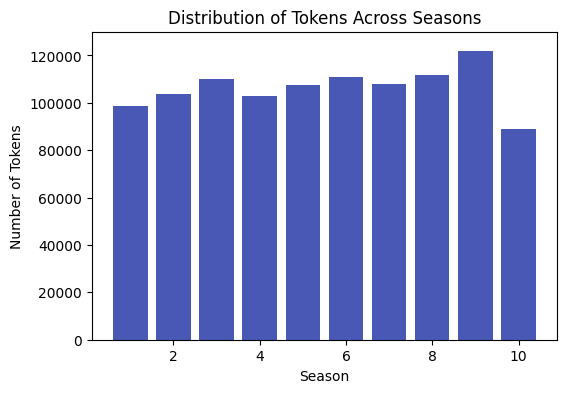

In [105]:
season_range= list(range(1,11))
plt.figure(figsize=(6,4))

plt.bar(season_range,tokens_per_season,color='#4958B5')
plt.title('Distribution of Tokens Across Seasons', fontsize=12)
plt.ylabel('Number of Tokens', fontsize=10)
plt.xlabel('Season', fontsize=10)
plt.ylim([0, 130000])

plt.show()

In [106]:
total_number_of_norm_tokens = 0
uniquetokens_per_season =[]
for season in range(1,11):
  print("Number of unique tokens in season {} is: {}".format(season, len(set(tokens_norm[season]))))
  total_number_of_norm_tokens += len(set(tokens_norm[season]))
  uniquetokens_per_season.append(len(set(tokens_norm[season])))

print("The total number of unique tokens across all season is: {}".format(total_number_of_norm_tokens))

Number of unique tokens in season 1 is: 3691
Number of unique tokens in season 2 is: 3649
Number of unique tokens in season 3 is: 3772
Number of unique tokens in season 4 is: 3444
Number of unique tokens in season 5 is: 3409
Number of unique tokens in season 6 is: 3435
Number of unique tokens in season 7 is: 3651
Number of unique tokens in season 8 is: 3654
Number of unique tokens in season 9 is: 3954
Number of unique tokens in season 10 is: 3409
The total number of unique tokens across all season is: 36068


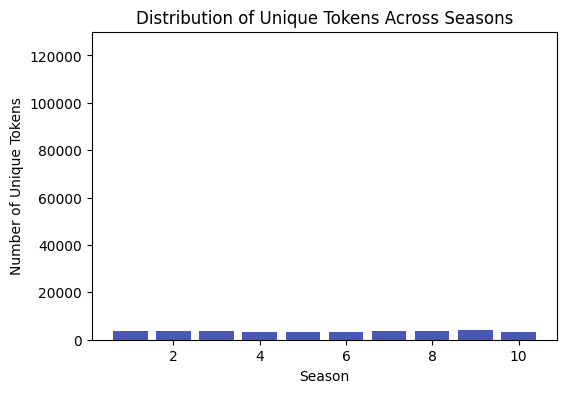

In [108]:
uniquetokens_per_season
plt.figure(figsize=(6,4))

season_range= list(range(1,11))
plt.bar(season_range,uniquetokens_per_season,color='#4958B5')
plt.title('Distribution of Unique Tokens Across Seasons', fontsize=12)
plt.ylabel('Number of Unique Tokens', fontsize=10)
plt.xlabel('Season', fontsize=10)
plt.ylim([0, 130000])

plt.show()

In [109]:
for season in range(1,3):
  print("The 50 tokens in first 3 season are {}".format(tokens_all[season][:50]))
  print("The 50 lemmatized tokens in first 3  season are {}".format(tokens_norm[season][:50]))



The 50 tokens in first 3 season are ['▁there', "'", 's', '▁nothing', '▁to', '▁tell', '.', '▁it', "'", 's', '▁just', '▁some', '▁guy', '▁i', '▁work', '▁with', '.', '▁you', "'", 're', '▁going', '▁out', '▁with', '▁him', '.', '▁there', "'", 's', '▁got', '▁to', '▁be', '▁something', '▁wrong', '▁with', '▁him', '.', '▁all', '▁right', ',', '▁jo', 'ey', ',', '▁be', '▁n', 'ice', '.', '▁so', ',', '▁does', '▁he']
The 50 lemmatized tokens in first 3  season are ['▁there', "'", 's', '▁nothing', '▁to', '▁tell', '.', '▁it', "'", 's', '▁just', '▁some', '▁guy', '▁i', '▁work', '▁with', '.', '▁you', "'", 're', '▁going', '▁out', '▁with', '▁him', '.', '▁there', "'", 's', '▁got', '▁to', '▁be', '▁something', '▁wrong', '▁with', '▁him', '.', '▁all', '▁right', ',', '▁jo', 'ey', ',', '▁be', '▁n', 'ice', '.', '▁so', ',', '▁does', '▁he']
The 50 tokens in first 3 season are ['▁this', '▁is', '▁pret', 'ty', '▁much', '▁what', "'", 's', '▁happened', '▁so', '▁far', '.', '▁ross', '▁was', '▁in', '▁love', '▁with', '▁ra', 'che

Average number of characters per token in season 1 is: 3.2147
Average number of characters per token in season 2 is: 3.2042
Average number of characters per token in season 3 is: 3.2173
Average number of characters per token in season 4 is: 3.2178
Average number of characters per token in season 5 is: 3.1898
Average number of characters per token in season 6 is: 3.2428
Average number of characters per token in season 7 is: 3.2532
Average number of characters per token in season 8 is: 3.2149
Average number of characters per token in season 9 is: 3.2444
Average number of characters per token in season 10 is: 3.2262


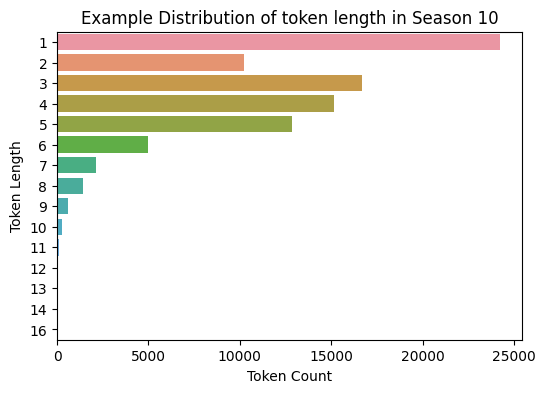

In [113]:
# Create list of token lengths for each token
for season in range(1,11):
  token_length = [len(t) for t in tokens_all[season]]
  # Average number of characters per token

  print("Average number of characters per token in season {} is: {}".format(season, round(np.mean(token_length),4)))

# Plot distribution
plt.figure(figsize=(6,4))
sns.countplot(y=token_length)
plt.ylabel('Token Length', fontsize=10)
plt.xlabel('Token Count', fontsize=10)
plt.title("Example Distribution of token length in Season 10", size=12); # There are a few tokens that is very long but also very rare

Let's find the distribution of the tokens that has character length longer than 10.

In [114]:
# example distribution of token character length for season 10
pd.DataFrame(data=token_length, columns=['length']).query("length>10").value_counts()

length
11        119
12         45
13         13
14          3
16          1
dtype: int64

Lets find out the rare tokens which has a token length longer than 15 characters. During preprocessing, finding and removing meaningless tokens among these rare tokens is considered as a good practice to avoid having them in the token vectors.

In [115]:
for season in range(1,11):
  print([t for t in  tokens_all[season] if len(t)>=15])


['▁responsibility', '▁responsibility']
['▁responsibility', '▁responsibility']
['▁responsibility', '▁representation']
['▁responsibility', '▁responsibility', '▁responsibility', '▁responsibility', '▁responsibility', '▁transportation', '▁responsibility']
[]
['▁responsibility', '▁responsibility', '▁responsibility']
['▁responsibility', '▁representative', '▁transportation', '▁responsibility']
[]
['▁responsibility', '▁responsibility', '▁responsibility', '▁responsibility', '▁responsibility']
['▁internationally']


Let's look at the stop words from nltk library

In [116]:
stop_words = stopwords.words("english")
print(f"There are {len(stop_words)} stopwords.\n")
print(stop_words)

There are 179 stopwords.

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own

We can extend the stop words based on our own text

**What** other words occur so often such that could be added to stop words?

In [47]:
stop_words.extend(["cannot", "could", "done", "let", "may" "mayn",  "might", "must", "need", "ought", "oughtn", "shall", "would", "br"])
print(f"There are {len(stop_words)} stopwords.\n")

There are 192 stopwords.



Let's find what are the most freuquent stop words in our text.

In [117]:
for season in range(1,11):
  freq_stopwords = [(sw, tokens_norm[season].count(sw)) for sw in stop_words]
  freq_stopwords.sort(key=lambda x: x[1], reverse=True)
  print("The top ten frequent stopwords of season {} are".format(season))
  print(freq_stopwords[:10])

The top ten frequent stopwords of season 1 are
[('s', 1739), ('t', 950), ('m', 687), ('y', 473), ('re', 454), ('i', 217), ('ll', 198), ('be', 189), ('ve', 159), ('a', 139)]
The top ten frequent stopwords of season 2 are
[('s', 1708), ('t', 944), ('m', 616), ('y', 585), ('re', 476), ('ll', 241), ('i', 213), ('be', 206), ('ve', 174), ('a', 134)]
The top ten frequent stopwords of season 3 are
[('s', 1834), ('t', 1086), ('m', 693), ('y', 548), ('re', 490), ('be', 235), ('i', 220), ('ll', 213), ('ve', 155), ('a', 142)]
The top ten frequent stopwords of season 4 are
[('s', 1564), ('t', 1033), ('m', 675), ('y', 584), ('re', 464), ('ll', 209), ('be', 204), ('i', 175), ('ve', 141), ('d', 124)]
The top ten frequent stopwords of season 5 are
[('s', 1643), ('t', 1022), ('m', 694), ('y', 574), ('re', 469), ('be', 277), ('ll', 204), ('i', 164), ('ve', 145), ('d', 118)]
The top ten frequent stopwords of season 6 are
[('s', 1721), ('t', 1145), ('m', 688), ('y', 602), ('re', 533), ('be', 292), ('ll', 2

What is the proportion of the stopwords in our text per season?

In [118]:
for season in range(1,11):
  n_stopwords = len([t for t in tokens_norm[season] if t in stop_words])
  print(f"{n_stopwords} tokens are stop words out of {len(tokens_norm[season])} tokens in season {season}.")
  print(f"That is {round(100*n_stopwords/len(tokens_norm[season]),2)}%.")

5861 tokens are stop words out of 98749 tokens in season 1.
That is 5.94%.
5939 tokens are stop words out of 103542 tokens in season 2.
That is 5.74%.
6310 tokens are stop words out of 109942 tokens in season 3.
That is 5.74%.
5716 tokens are stop words out of 103060 tokens in season 4.
That is 5.55%.
5932 tokens are stop words out of 107307 tokens in season 5.
That is 5.53%.
6230 tokens are stop words out of 110976 tokens in season 6.
That is 5.61%.
6239 tokens are stop words out of 107760 tokens in season 7.
That is 5.79%.
6748 tokens are stop words out of 111709 tokens in season 8.
That is 6.04%.
7162 tokens are stop words out of 121915 tokens in season 9.
That is 5.87%.
5274 tokens are stop words out of 88807 tokens in season 10.
That is 5.94%.


What is the number of tokens without stop words?

In [119]:
# first clean stop words
tokens_clean = {}
for season in range(1,11):
  tokens_clean[season] = [t for t in tokens_norm[season] if t not in stop_words]
  print(f"Number of tokens for season {season} is: {len(tokens_clean[season])}")

Number of tokens for season 1 is: 92888
Number of tokens for season 2 is: 97603
Number of tokens for season 3 is: 103632
Number of tokens for season 4 is: 97344
Number of tokens for season 5 is: 101375
Number of tokens for season 6 is: 104746
Number of tokens for season 7 is: 101521
Number of tokens for season 8 is: 104961
Number of tokens for season 9 is: 114753
Number of tokens for season 10 is: 83533


# Common n-grams

In [120]:
def preprocess_text(rslt_df):
    narrative = ''.join(rslt_df['line'])
    tokeniser = RegexpTokenizer(r'[A-Za-z]{2,}')
    tokens = tokeniser.tokenize(narrative)
    # Lowercase and lemmatise
    lemmatiser = WordNetLemmatizer()
    lemmas = [lemmatiser.lemmatize(token.lower(), pos='v') for token in tokens]
    # Remove stopwords
    keywords = [lemma for lemma in lemmas if lemma not in stop_words]
    return keywords

In [121]:
def get_frequent_ngram(keywords, ngram, n=20):
    """Find most common n n-grams tokens."""
    # Find ngrams per document
    n_grams = list(ngrams(keywords, ngram))

    # Find frequency of ngrams
    n_grams_flattened = [item for sublist in n_grams for item in sublist]
    freq_dist = FreqDist(n_grams_flattened)
    top_freq = freq_dist.most_common(n)
    return pd.DataFrame(top_freq, columns=["ngram", "count"])

<ipython-input-123-88f8cd93a34b>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(6,4))


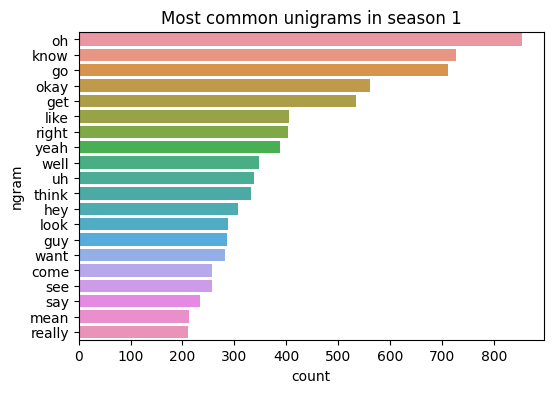

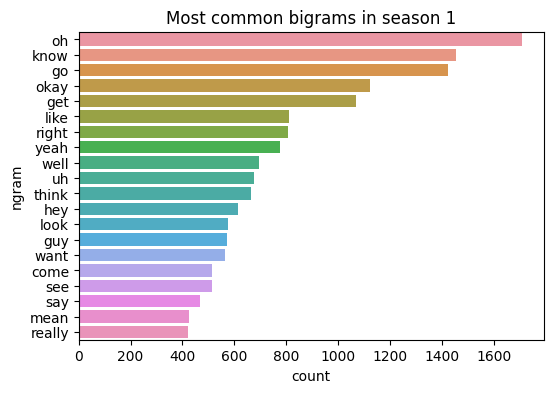

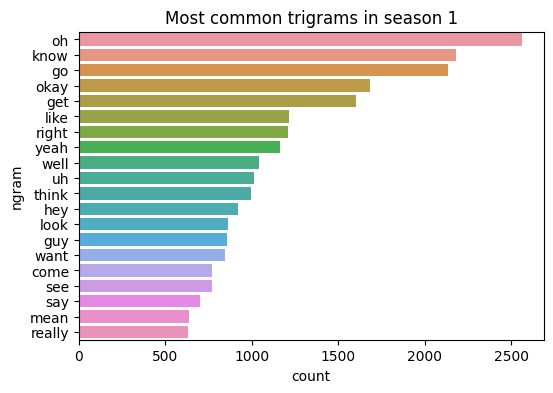

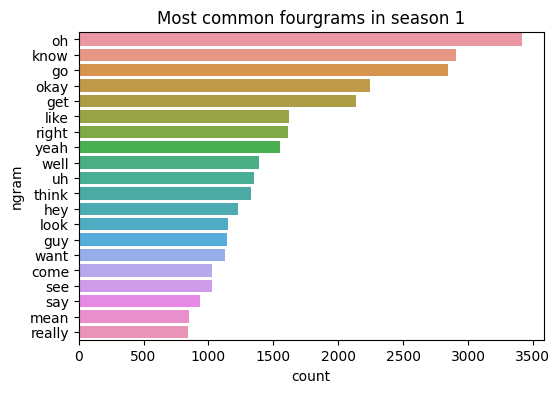

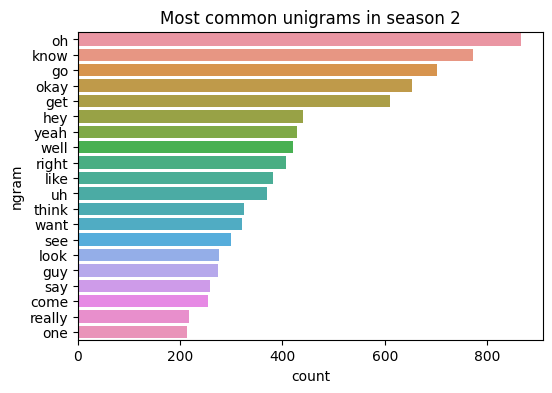

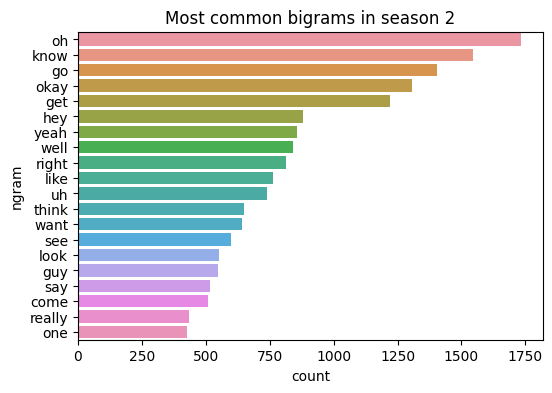

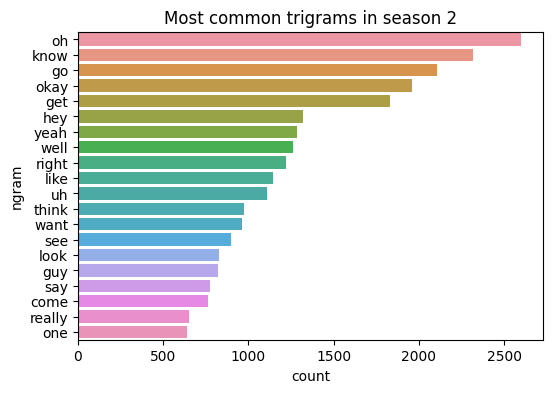

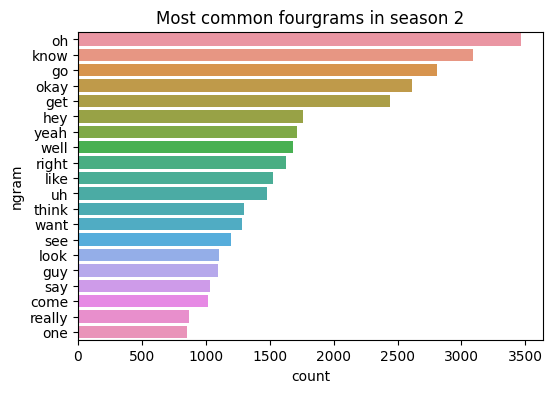

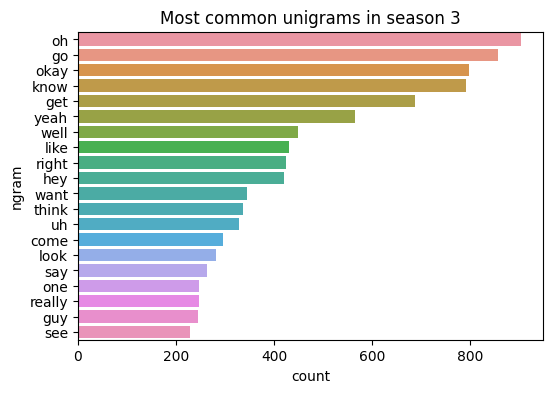

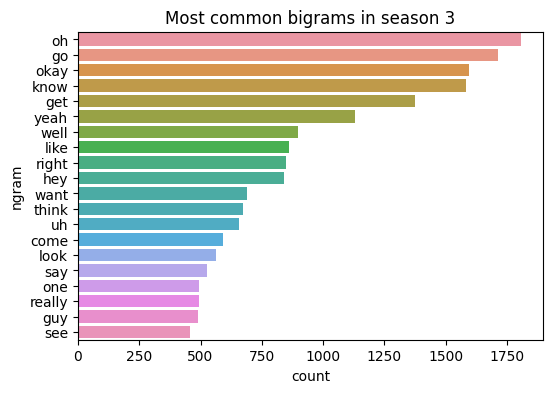

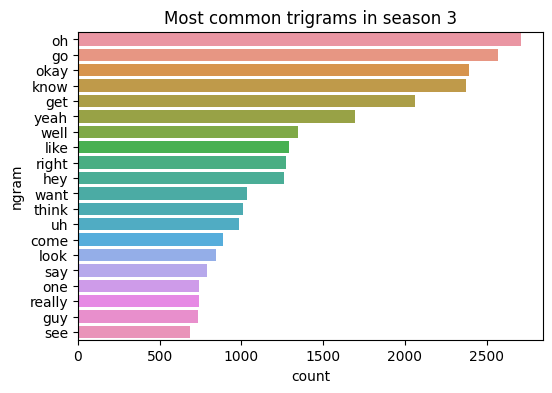

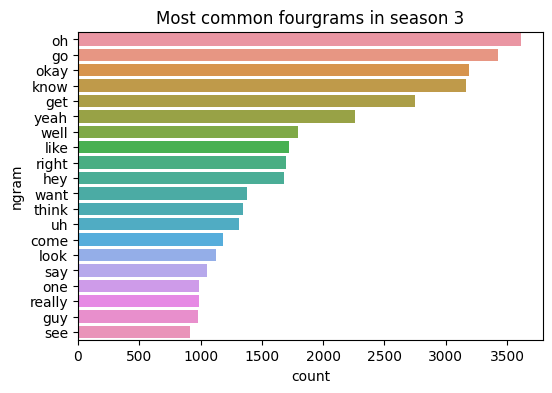

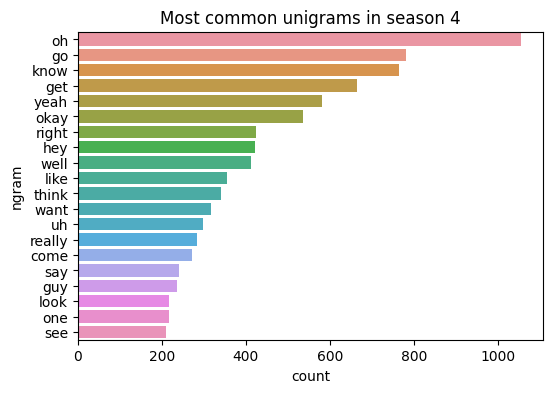

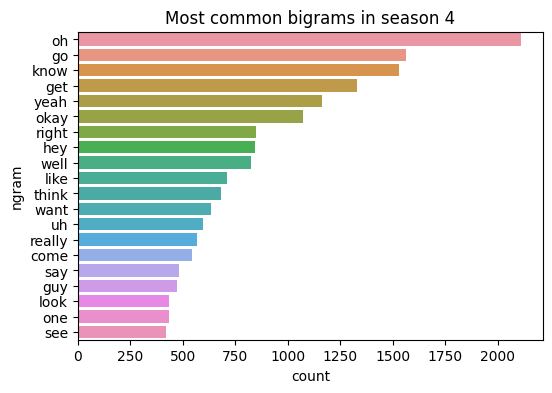

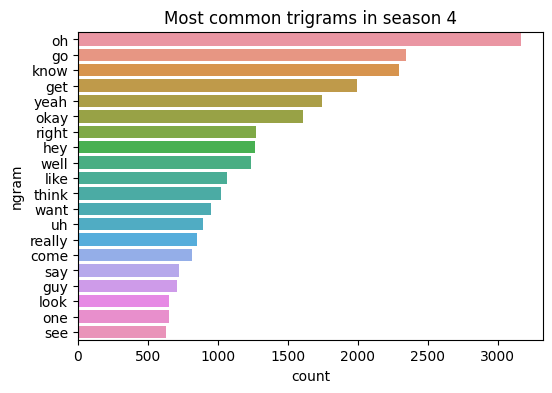

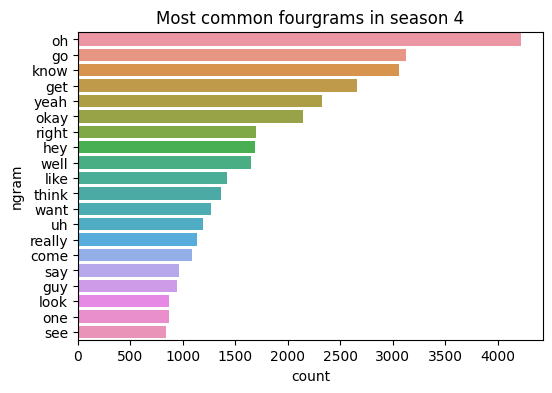

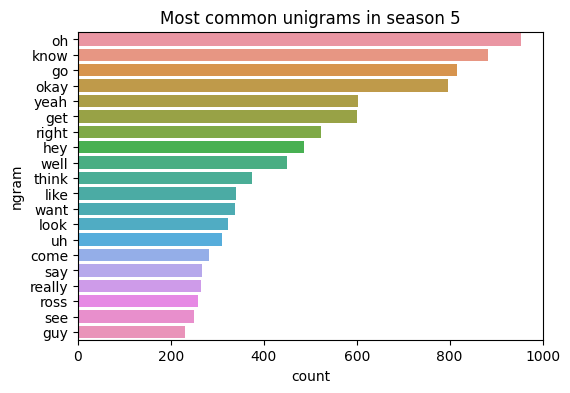

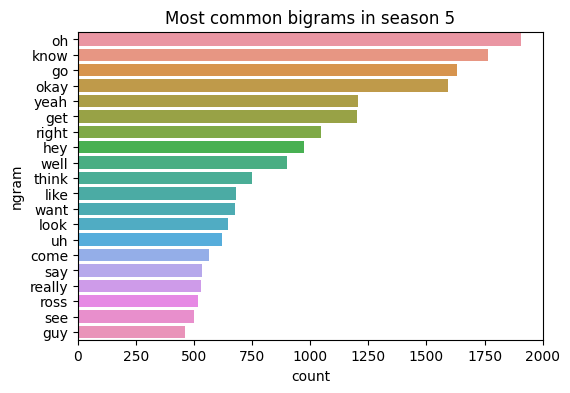

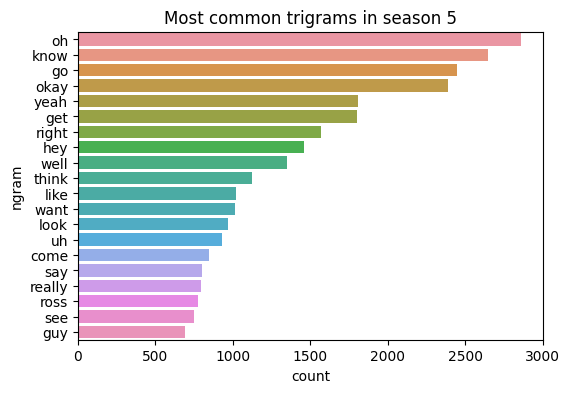

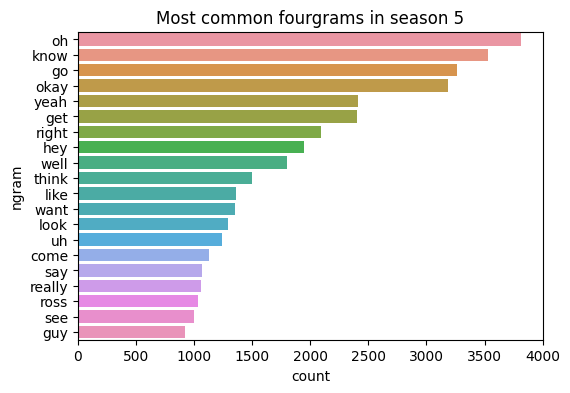

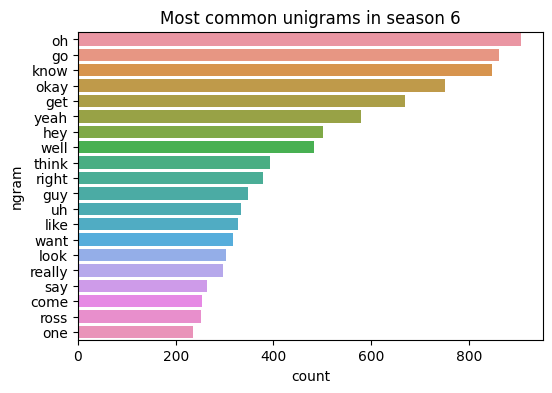

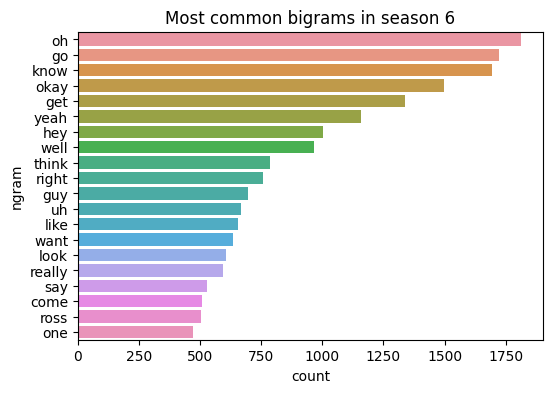

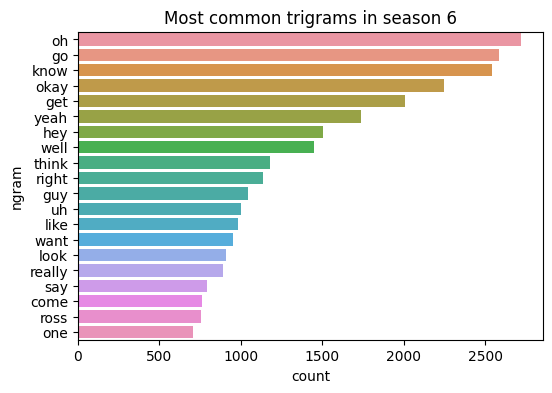

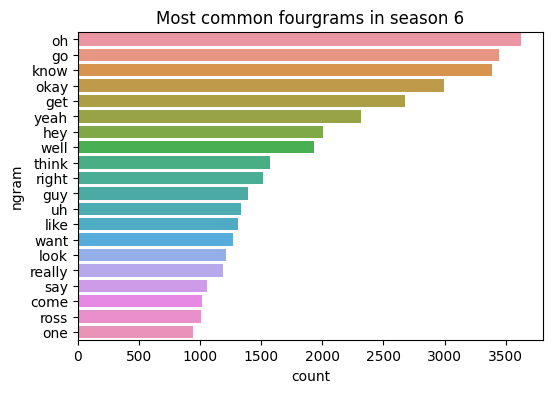

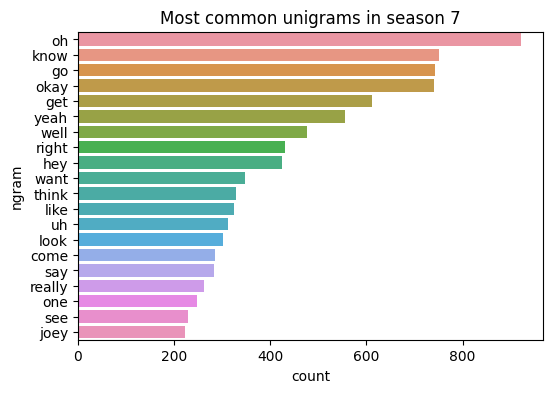

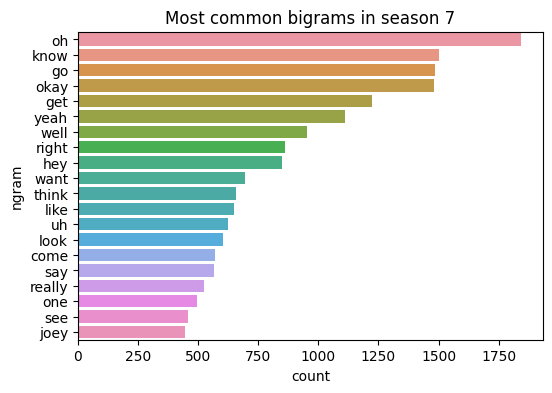

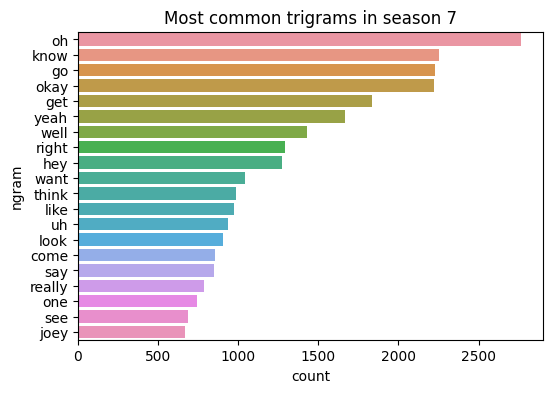

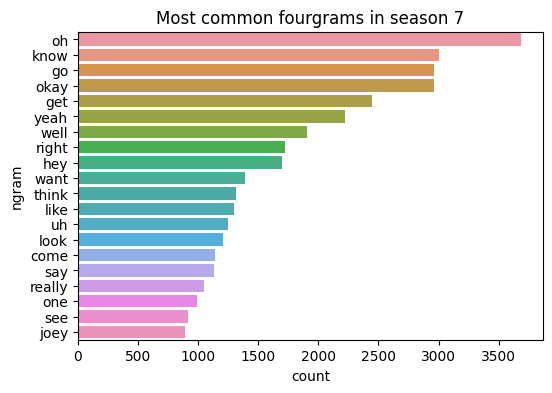

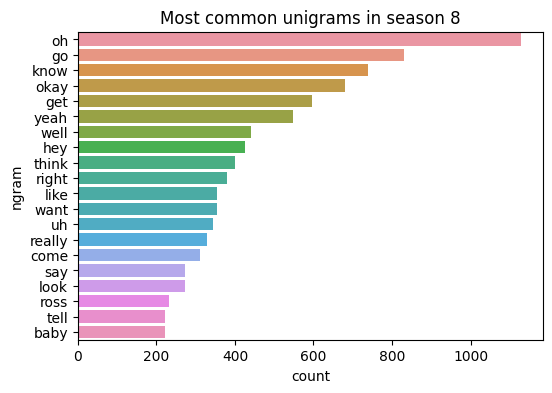

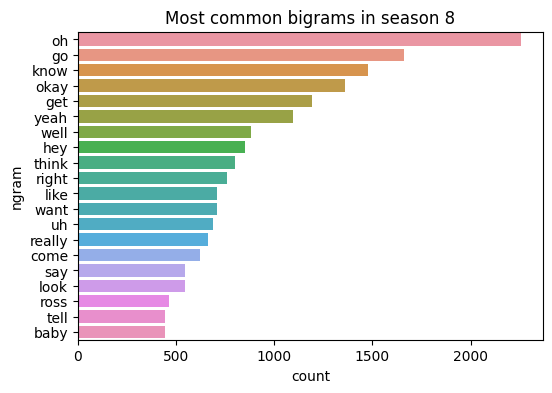

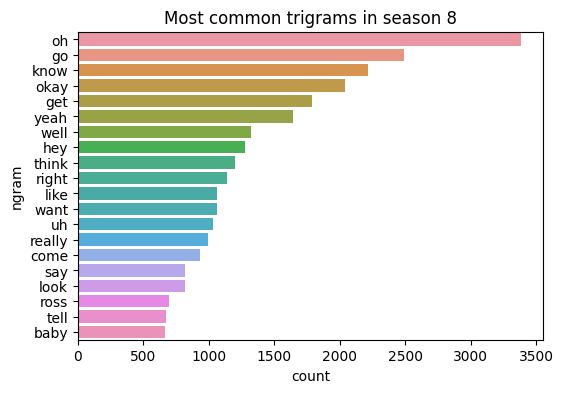

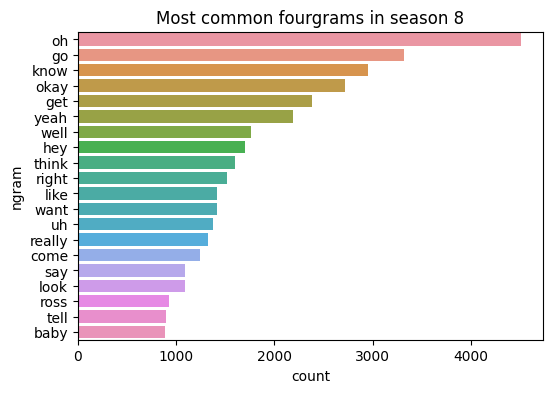

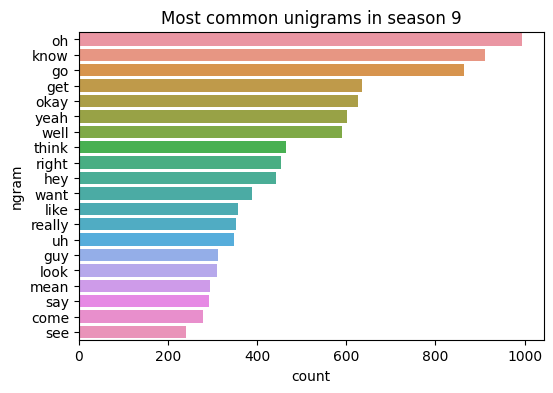

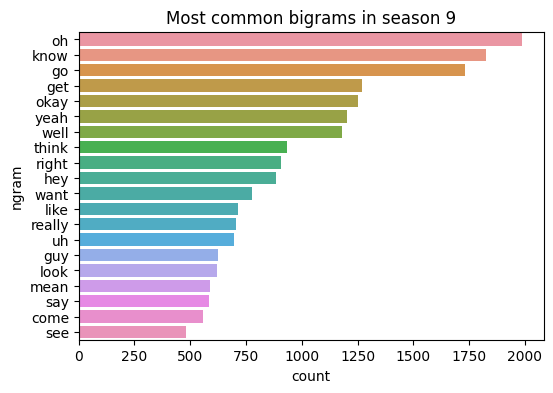

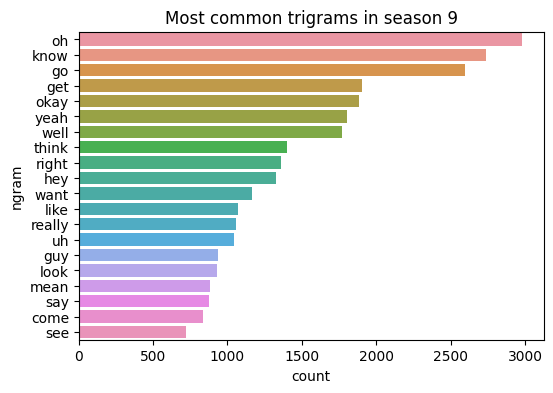

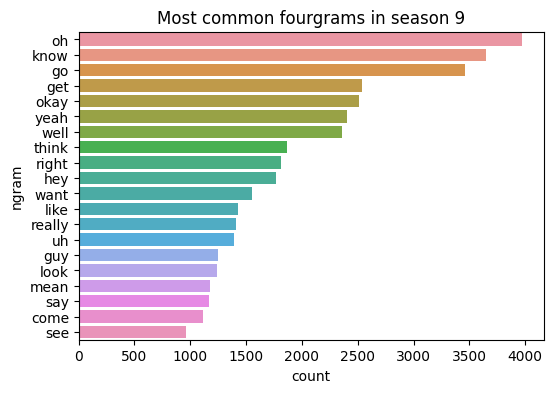

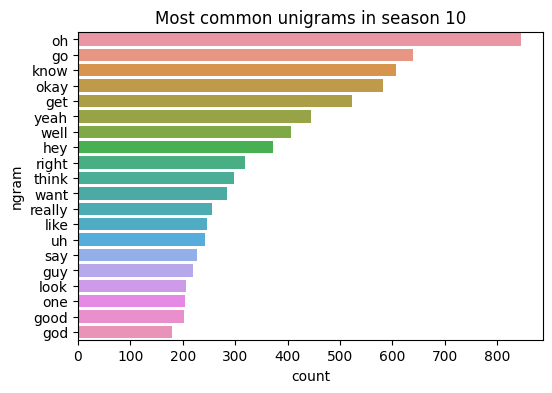

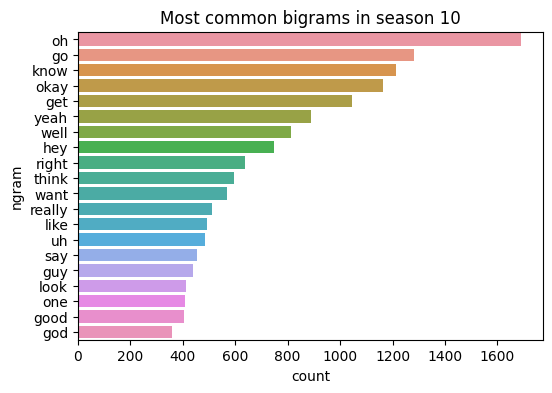

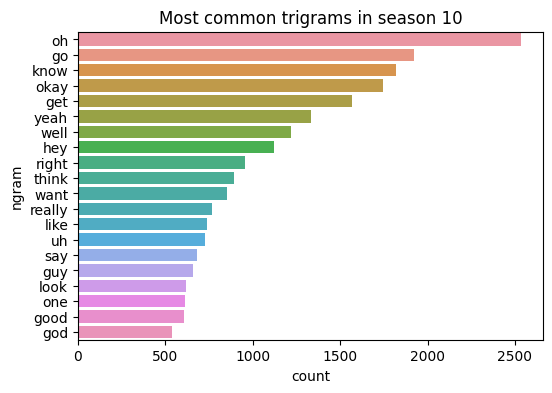

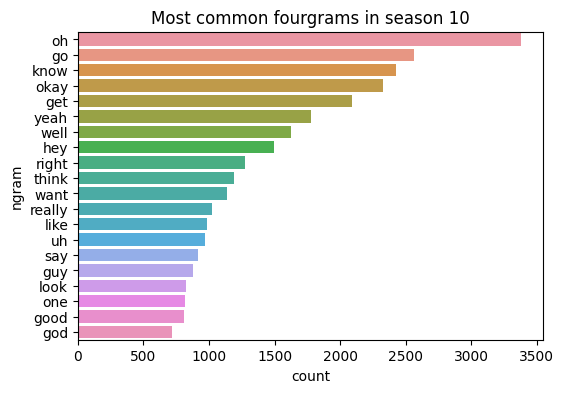

In [123]:
# Get frequent ngrams for all 4
for season in range(1,11):
  rslt_df = data[data['season'] == season]
  keywords = preprocess_text(rslt_df)
  for i in range(1,5):
    mapping = {1:"uni", 2:"bi", 3:"tri", 4:"four"}
    plt.figure(figsize=(6,4))
    sns.barplot(x="count", y="ngram", data=get_frequent_ngram(keywords, i))
    plt.title(f"Most common {mapping[i]}grams in season {season}");

# The number of Lines

In [124]:
print("The total number of lines in ten season of Friends is {}".format(len(corpus)))

The total number of lines in ten season of Friends is 128698


# The lines per season

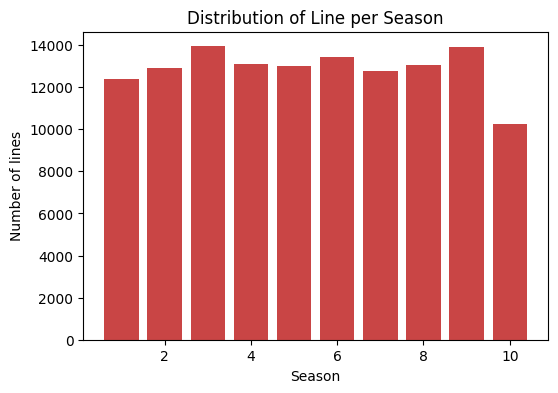

In [127]:
countS = Counter(seasons)
del countS['Season']

vals = list(countS.values())[9:]+list(countS.values())[:9]
keys = list(countS.keys())[9:]+list(countS.keys())[:9]
countS = dict(zip(keys, vals))

plt.figure(figsize=(6,4))
plt.bar(countS.keys(), countS.values(), color='#C94545')
plt.title('Distribution of Line per Season')
plt.ylabel('Number of lines')
plt.xlabel('Season')
plt.show()

a = countS.values()
season_lines = []
for keys in countS:
    #print(countS[keys])
    season_lines.append(countS[keys])

# mean of season lines
eman_season_lines = np.mean(season_lines)
std_season_lines = np.std(season_lines)
var_season_lines = np.var(season_lines)

# Lines per episode


dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 12, 25])


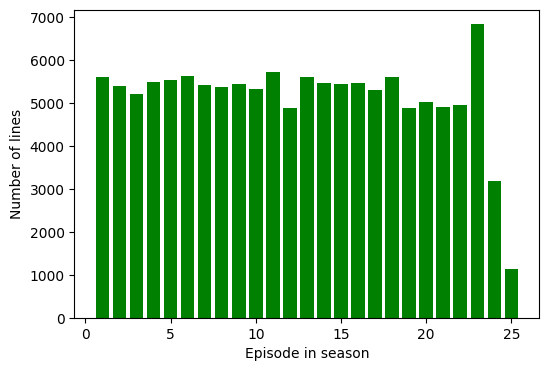

In [128]:
#lines per episode
countE = Counter(episodes)
print(countE.keys())

del countE['Episode']
plt.figure(figsize=(6,4))
plt.bar(countE.keys(), countE.values(), color='green')
plt.ylabel('Number of lines')
plt.xlabel('Episode in season')
plt.show()


episode_lines = []
for keys in countE:
    #print(countE[keys])
    episode_lines.append(countE[keys])

# mean of season lines
eman_season_lines = np.mean(episode_lines)
std_season_lines = np.std(episode_lines)
var_season_lines = np.var(episode_lines)

## Transcript Collected From the Internet
This dataset contains the set of Friends transcripts from a [Github repository(https://fangj.github.io/friends/) which were curated by the fans. Therefore, these transcripts do not refer to the 100% the original transcripts and might miss some discourse between the characters in the show.

# Character Analysis

In [129]:
  data = pd.read_csv('/content/internet_found_friends_transcript.csv', encoding='ISO-8859-1')
  seasons = data['season']
  episodes = data['episode']
  corpus = data['line']
  narrator = data['narrator']
  print(corpus[:5]) # Shows the first 5 lines of the corpus)

0     there's nothing to tell! he's just some guy i...
1     c'mon, you're going out with the guy! there's...
2     all right joey, be nice.Â  so does he have a ...
3                            wait, does he eat chalk? 
4     just, 'cause, i don't want her to go through ...
Name: line, dtype: object


In [131]:
count = Counter(narrator)
print("{} characters took part in Friends across 10 Seasons".format(len(count.keys())))

359 characters took part in Friends across 10 Seasons


In [132]:
print(narrator.unique())

['monica:' 'joey:' 'chandler:' 'phoebe:' 'all:' 'ross:' 'rachel:'
 'waitress:' 'paul:' 'frannie:' 'customer:' 'marsha:' 'carol:' 'susan:'
 'barry:' 'robbie:' 'bernice:' 'paula:' 'alan:' 'lizzie:' 'guys:'
 'leslie:' 'kiki:' 'joanne:' 'receptionist:' 'both:' 'kid:' 'angela:'
 'janice:' 'woman:' 'bob:' 'aurora:' 'director:' 'jill:' 'paolo:'
 'shelley:' 'nurse:' 'andrea:' 'lowell:' 'terry:' 'guy:' 'girl:' 'max:'
 'david:' 'sandy:' 'girls:' 'roger:' 'ronni:' 'lorraine:' 'kristin:'
 'celia:' 'steve:' 'ursula:' 'teacher:' 'helen:' 'nina:' 'jamie:' 'fran:'
 'intercom:' 'luisa:' 'bobby:' 'mindy:' 'danielle:' 'pa:' 'actor:'
 'gerston:' 'santos:' 'petrie:' 'lydia:' 'janitor:' 'melanie:' 'man:'
 'carl:' 'julie:' 'paulo:' 'frankie:' 'annabelle:' 'alison:' 'stranger:'
 'duncan:' 'rahcel:' 'jade:' 'waiter:' 'machine:' 'caroline:' 'boys:'
 'doctor:' 'stephanie:' 'together:' 'chan:' 'rach:' 'phoe:' 'mnca:'
 'mich:' 'rtst:' 'radio:' 'gunther:' 'gang:' 'grandmother:' 'fbob:'
 'russ:' 'estl:' 'minister:' 

In [133]:
# remove characters who talks less than 1000 lines
narrator_count={}

i = 0
for j in count.keys():
    if list(count.values())[i] > 200:
      name = list(count.keys())[i]
      name=re.sub(":","",name)
      name= name.capitalize()
      narrator_count[name] = list(count.values())[i]
    i += 1
#print(narrator_count)

sorted_narrator_count = sorted(narrator_count.items(), key=lambda x:x[1])

print("The characters had higest number of lines in ascending order is:")
print(sorted_narrator_count)

character_lines = {}

for i in sorted_narrator_count:
   character_lines[i[0]] =  i[1]

The characters had higest number of lines in ascending order is:
[('Janice', 217), ('Richard', 245), ('All', 338), ('Mike', 359), ('Phoebe', 7353), ('Joey', 8139), ('Monica', 8235), ('Chandler', 8320), ('Ross', 9011), ('Rachel', 9073)]


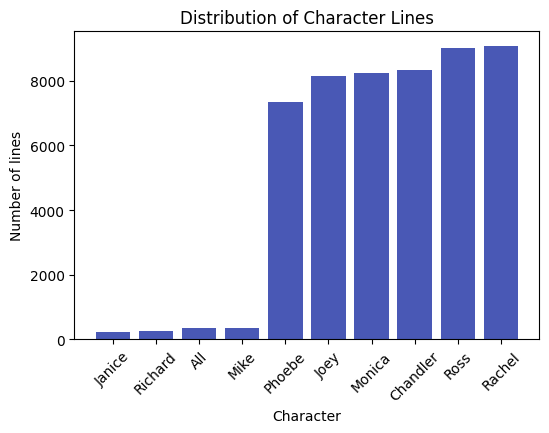

In [134]:
# Plot the character lines
plt.figure(figsize=(6,4))
plt.bar(character_lines.keys(), character_lines.values(), color='#4958B5')
plt.title('Distribution of Character Lines', fontsize=12)
plt.ylabel('Number of lines', fontsize=10)
plt.xlabel('Character', fontsize=10)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.show()

#Number of characters per season

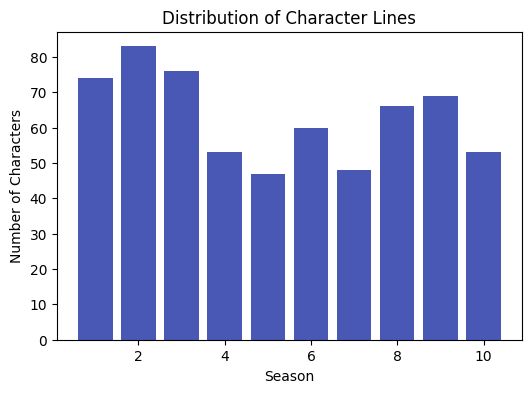

In [135]:
# Number of characters per season
season_narrator = {}
for season in range(1,11):
    rslt_df = data[data['season'] == season]
    season_narrator[season]= rslt_df.narrator.unique().size


plt.figure(figsize=(6,4))
plt.bar(season_narrator.keys(), season_narrator.values(), color='#4958B5')
plt.title('Distribution of Character Lines', fontsize=12)
plt.ylabel('Number of Characters', fontsize=10)
plt.xlabel('Season', fontsize=10)
plt.show()
